In [ ]:
!pip install geopy
!pip install folium

import geopy;
from geopy.geocoders import Nominatim;
import folium;
from folium.plugins import HeatMap;

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! pip install kaggle

In [ ]:
! kaggle datasets download -d i2i2i2/cities-of-the-world

Dataset URL: https://www.kaggle.com/datasets/i2i2i2/cities-of-the-world
License(s): CC0-1.0
  0% 0.00/2.15M [00:00<?, ?B/s]
100% 2.15M/2.15M [00:00<00:00, 71.9MB/s]


In [ ]:
! unzip cities-of-the-world.zip

Archive:  cities-of-the-world.zip
  inflating: cities15000.csv         


In [ ]:
data = '/content/cities15000.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import geopandas as gpd

In [ ]:
df=pd.read_csv('/content/cities15000.csv', encoding = "ISO-8859-1")

print(df.head())

print(df['asciiname'][0:20])

  geonameid              name         asciiname  \
0   3040051      les Escaldes      les Escaldes   
1   3041563  Andorra la Vella  Andorra la Vella   
2    290594    Umm al Qaywayn    Umm al Qaywayn   
3    291074    Ras al-Khaimah    Ras al-Khaimah   
4    291696     Khawr Fakkn      Khawr Fakkan   

                                      alternatenames  latitude longitude  \
0  Ehskal'des-Ehndzhordani,Escaldes,Escaldes-Engo...  42.50729   1.53414   
1  ALV,Ando-la-Vyey,Andora,Andora la Vela,Andora ...  42.50779   1.52109   
2  Oumm al Qaiwain,Oumm al QaÌøwaÌøn,Um al Kawain...  25.56473  55.55517   
3  Julfa,Khaimah,RKT,Ra's al Khaymah,Ra's al-Chai...  25.78953   55.9432   
4  Fakkan,Fakkn,Khawr Fakkan,Khawr Fakkn,Khaw...  25.33132  56.34199   

  feature class feature code country code  cc2 admin1 code admin2 code  \
0             P         PPLA           AD  NaN           8         NaN   
1             P         PPLC           AD  NaN           7         NaN   
2             

In [ ]:
print(df.columns)

#print(df['asciiname'], df['population'])


df1 = df[['asciiname', 'population']]

df1 = df1.sort_values(by=['population'], ascending=False)

pop_df = df1.drop(7675)

print(pop_df.tail(1000))

print(df.info())



Index(['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude',
       'longitude', 'feature class', 'feature code', 'country code', 'cc2',
       'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code',
       'population', 'elevation', 'dem', 'timezone', 'modification date'],
      dtype='object')
                   asciiname population
2355                   Orsha     125347
13422            Ra's Bayrut    1251739
3263              Shahecheng     125132
2458                 Kelowna     125109
2167       Braganca Paulista     125096
...                      ...        ...
8253   Guam Government House          0
912            Chasse Royale          0
2307                Cambebba          0
7674                  Irvine        NaN
20895                 Irving        NaN

[1000 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23469 entries, 0 to 23468
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             ---

In [ ]:
try:
  df['latitude_flt'] = df['latitude'].astype(float)
  df['longitude_flt'] = df['longitude'].astype(float)
except:
  pass


m = folium.map(location = [df['latitude_flt'].mean(), df['longitude_flt'].mean()])

KeyError: 'latitude_flt'

In [ ]:
print(df.columns)
#print(df['asciiname'], df['population'])

df2 = df[['asciiname', 'population', "latitude", "longitude"]]



import pandas as pd

# Sample DataFrame creation for context (replace with actual DataFrame)
# df2 = pd.DataFrame({
#     'latitude': ['12.34', '56.78', 'NaN', 'PPLA2'],
#     'longitude': ['98.76', '54.32', 'NaN', '12.34'],
#     'population': ['1000', '2000', 'NaN', '3000']
# })

# Ensure 'latitude' and 'longitude' are converted to numeric, invalid parsing will be set as NaN
df2['latitude'] = pd.to_numeric(df2['latitude'], errors='coerce')
df2['longitude'] = pd.to_numeric(df2['longitude'], errors='coerce')
df2['population'] = pd.to_numeric(df2['population'], errors='coerce')

# Drop rows with NaN values in 'latitude', 'longitude', or 'population'
df2 = df2.dropna(subset=['latitude', 'longitude', 'population'])

# Now try to convert the remaining values to the appropriate types
try:
    df2['latitude_flt'] = df2['latitude'].astype(float)
    df2['longitude_flt'] = df2['longitude'].astype(float)
    df2['pop_int'] = df2['population'].astype(int)

except ValueError as e:
    print(f"Error: {e}")

# Display the summary statistics
print(df2.describe())


#df2.head(200000)

df2.describe()

print(df2['pop_int'].head(30))

Index(['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude',
       'longitude', 'feature class', 'feature code', 'country code', 'cc2',
       'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code',
       'population', 'elevation', 'dem', 'timezone', 'modification date'],
      dtype='object')
         population      latitude     longitude  latitude_flt  longitude_flt  \
count  2.346600e+04  23466.000000  23466.000000  23466.000000   23466.000000   
mean   1.156561e+05     27.770987     15.478623     27.770987      15.478623   
std    4.814023e+05     22.925422     71.023224     22.925422      71.023224   
min    0.000000e+00    -54.800000   -176.174530    -54.800000    -176.174530   
25%    2.201800e+04     14.968710    -45.429308     14.968710     -45.429308   
50%    3.574800e+04     34.367535     15.054760     34.367535      15.054760   
75%    7.522400e+04     44.632960     75.031305     44.632960      75.031305   
max    2.231547e+07     78.223340    179.364510  

<ipython-input-67-24cd8d342d34>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['latitude'] = pd.to_numeric(df2['latitude'], errors='coerce')
<ipython-input-67-24cd8d342d34>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['longitude'] = pd.to_numeric(df2['longitude'], errors='coerce')
<ipython-input-67-24cd8d342d34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

0       15853
1       20430
2       44411
3      115949
4       33575
5     1137347
6       30000
7       26395
8      543733
9       16000
10      62415
11     408733
12     226172
13      24716
14     603492
15      49851
16      64256
17      29264
18      55641
19      15967
20      52121
21      15377
22      47823
23      25636
24      15018
25      24544
26      56369
27      49157
28      22363
29      75900
Name: pop_int, dtype: int64


In [ ]:
df3 = df2.sort_values(by=['pop_int'], ascending=False)

df3.head(1000)

df3.describe().apply(lambda s: s.apply('{0:.5f}'.format))

#df3['pop_int'].median()



,population,latitude,longitude,latitude_flt,longitude_flt,pop_int
count,23466.00000,23466.00000,23466.00000,23466.00000,23466.00000,23466.00000
mean,115656.07343,27.77099,15.47862,27.77099,15.47862,115656.07343
std,481402.29282,22.92542,71.02322,22.92542,71.02322,481402.29282
min,0.00000,-54.80000,-176.17453,-54.80000,-176.17453,0.00000
25%,22018.00000,14.96871,-45.42931,14.96871,-45.42931,22018.00000
50%,35748.00000,34.36754,15.05476,34.36754,15.05476,35748.00000
75%,75224.00000,44.63296,75.03131,44.63296,75.03131,75224.00000
max,22315474.00000,78.22334,179.36451,78.22334,179.36451,22315474.00000


<ipython-input-22-6fc6eacb6058>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


<Axes: >

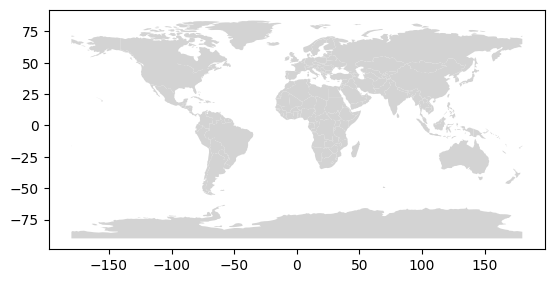

In [ ]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()



countries.plot(color="lightgrey")

<ipython-input-125-ddd6517e3266>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


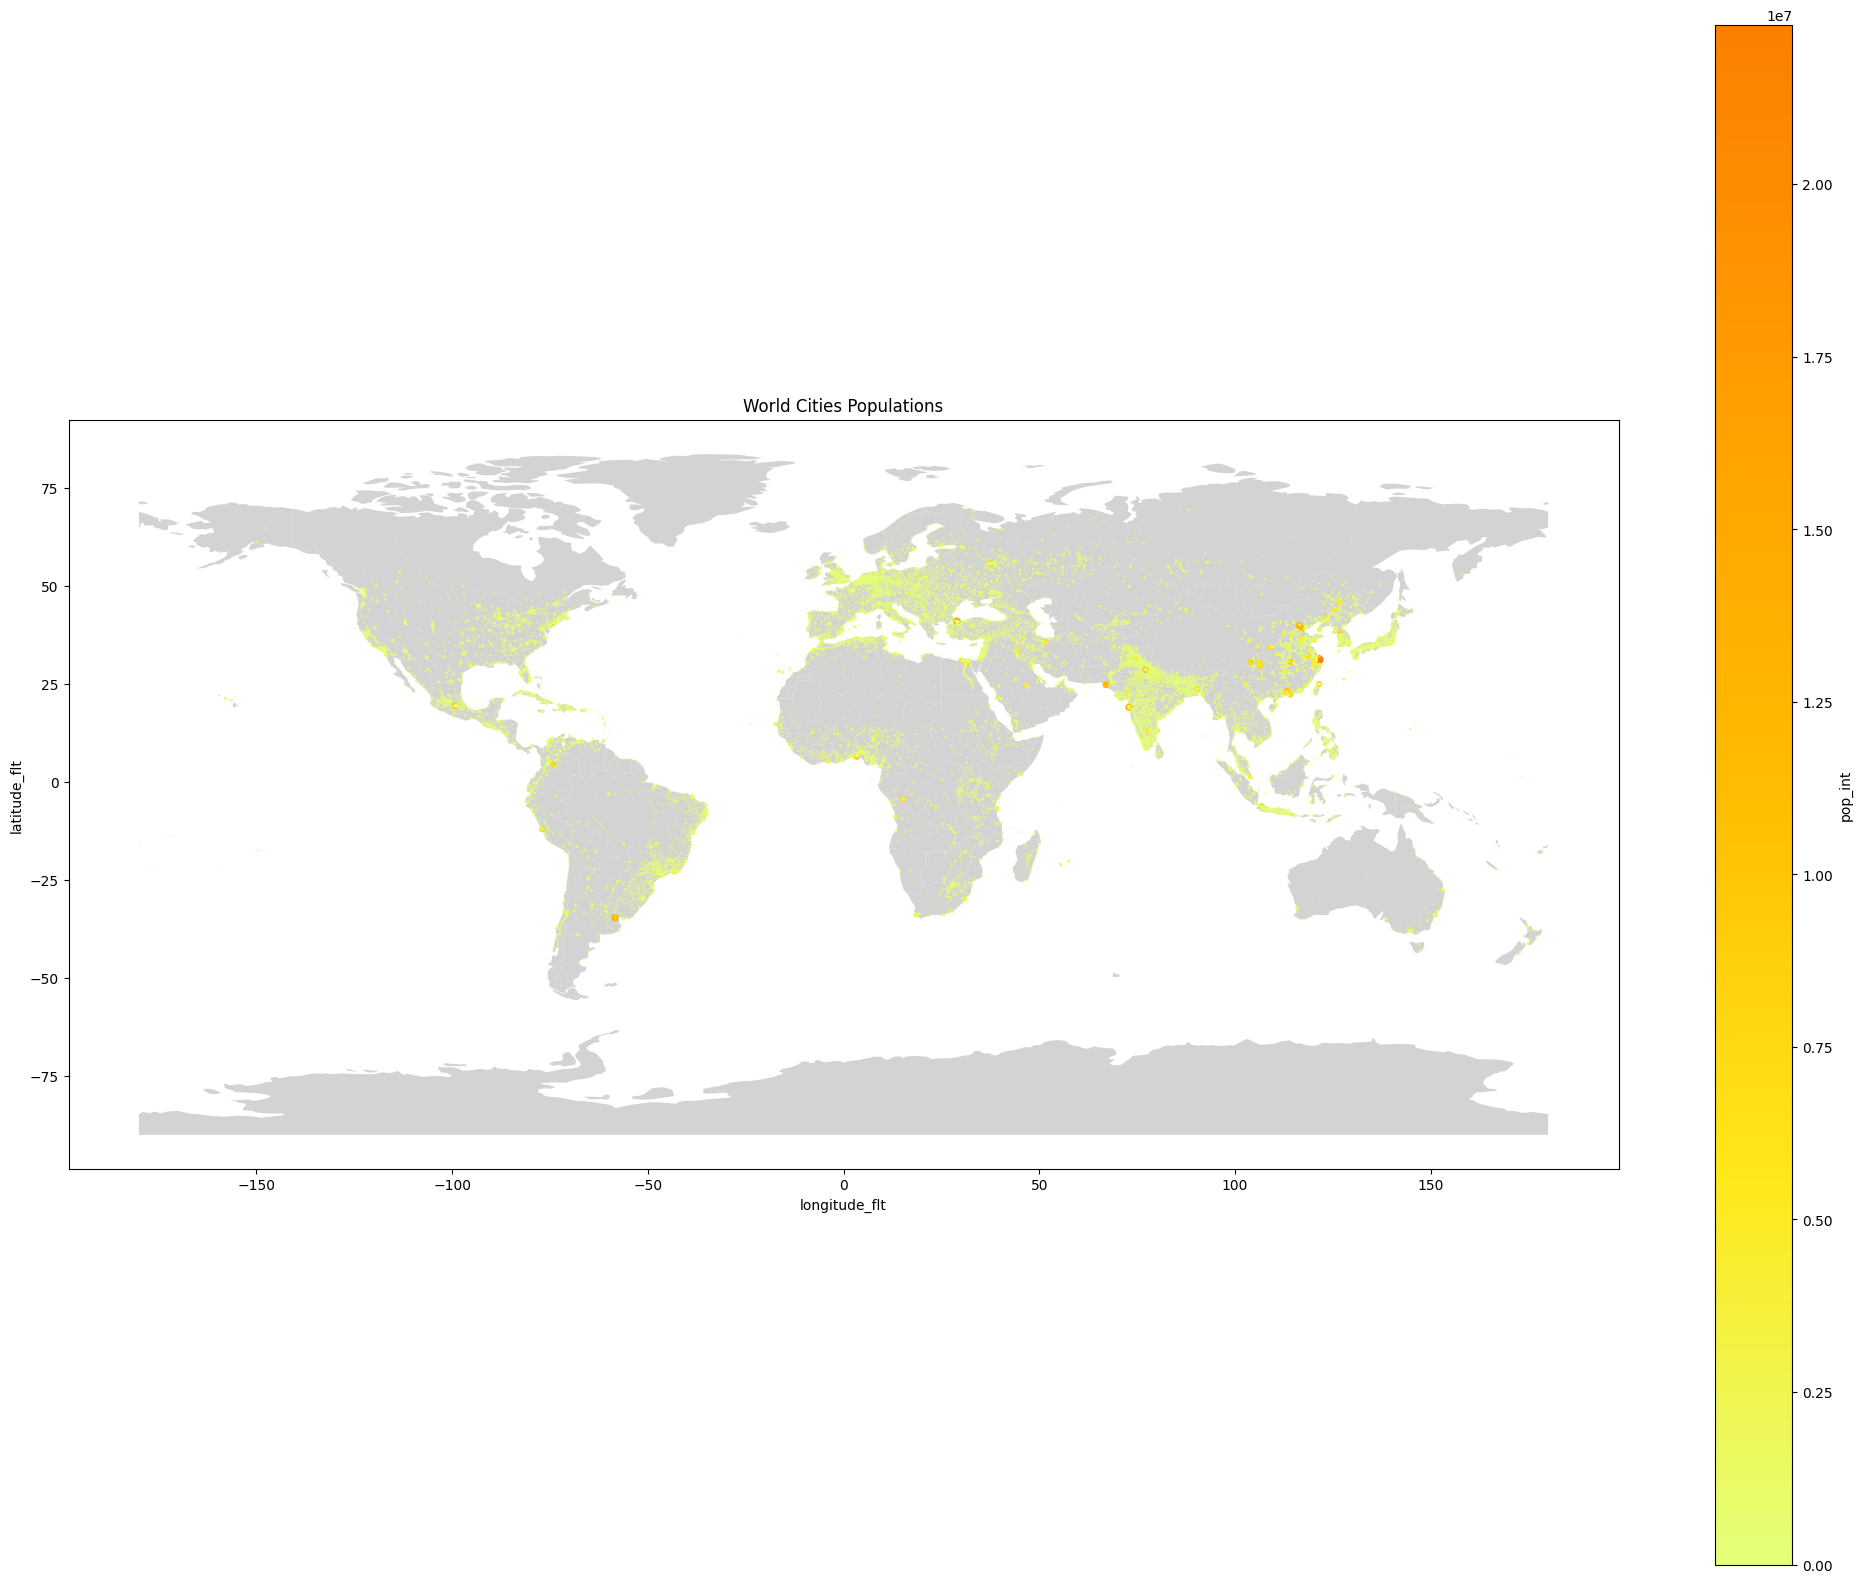

In [ ]:
# initialize an axis
fig, ax = plt.subplots(figsize=(25,20))
# plot map on axis
countries = gpd.read_file(
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey",
               ax=ax)

#countries


# plot points
df2.plot(x="longitude_flt", y="latitude_flt", kind="scatter",
        c="pop_int", colormap="Wistia", #RdPu, plasma
        s = 0.05* df2["pop_int"]/35748,
        title=f"World Cities Populations",
        alpha = np.minimum(df2["pop_int"]/300, 1),
        ax=ax)
# add grid

plt.show()

<ipython-input-118-3e07523031cd>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


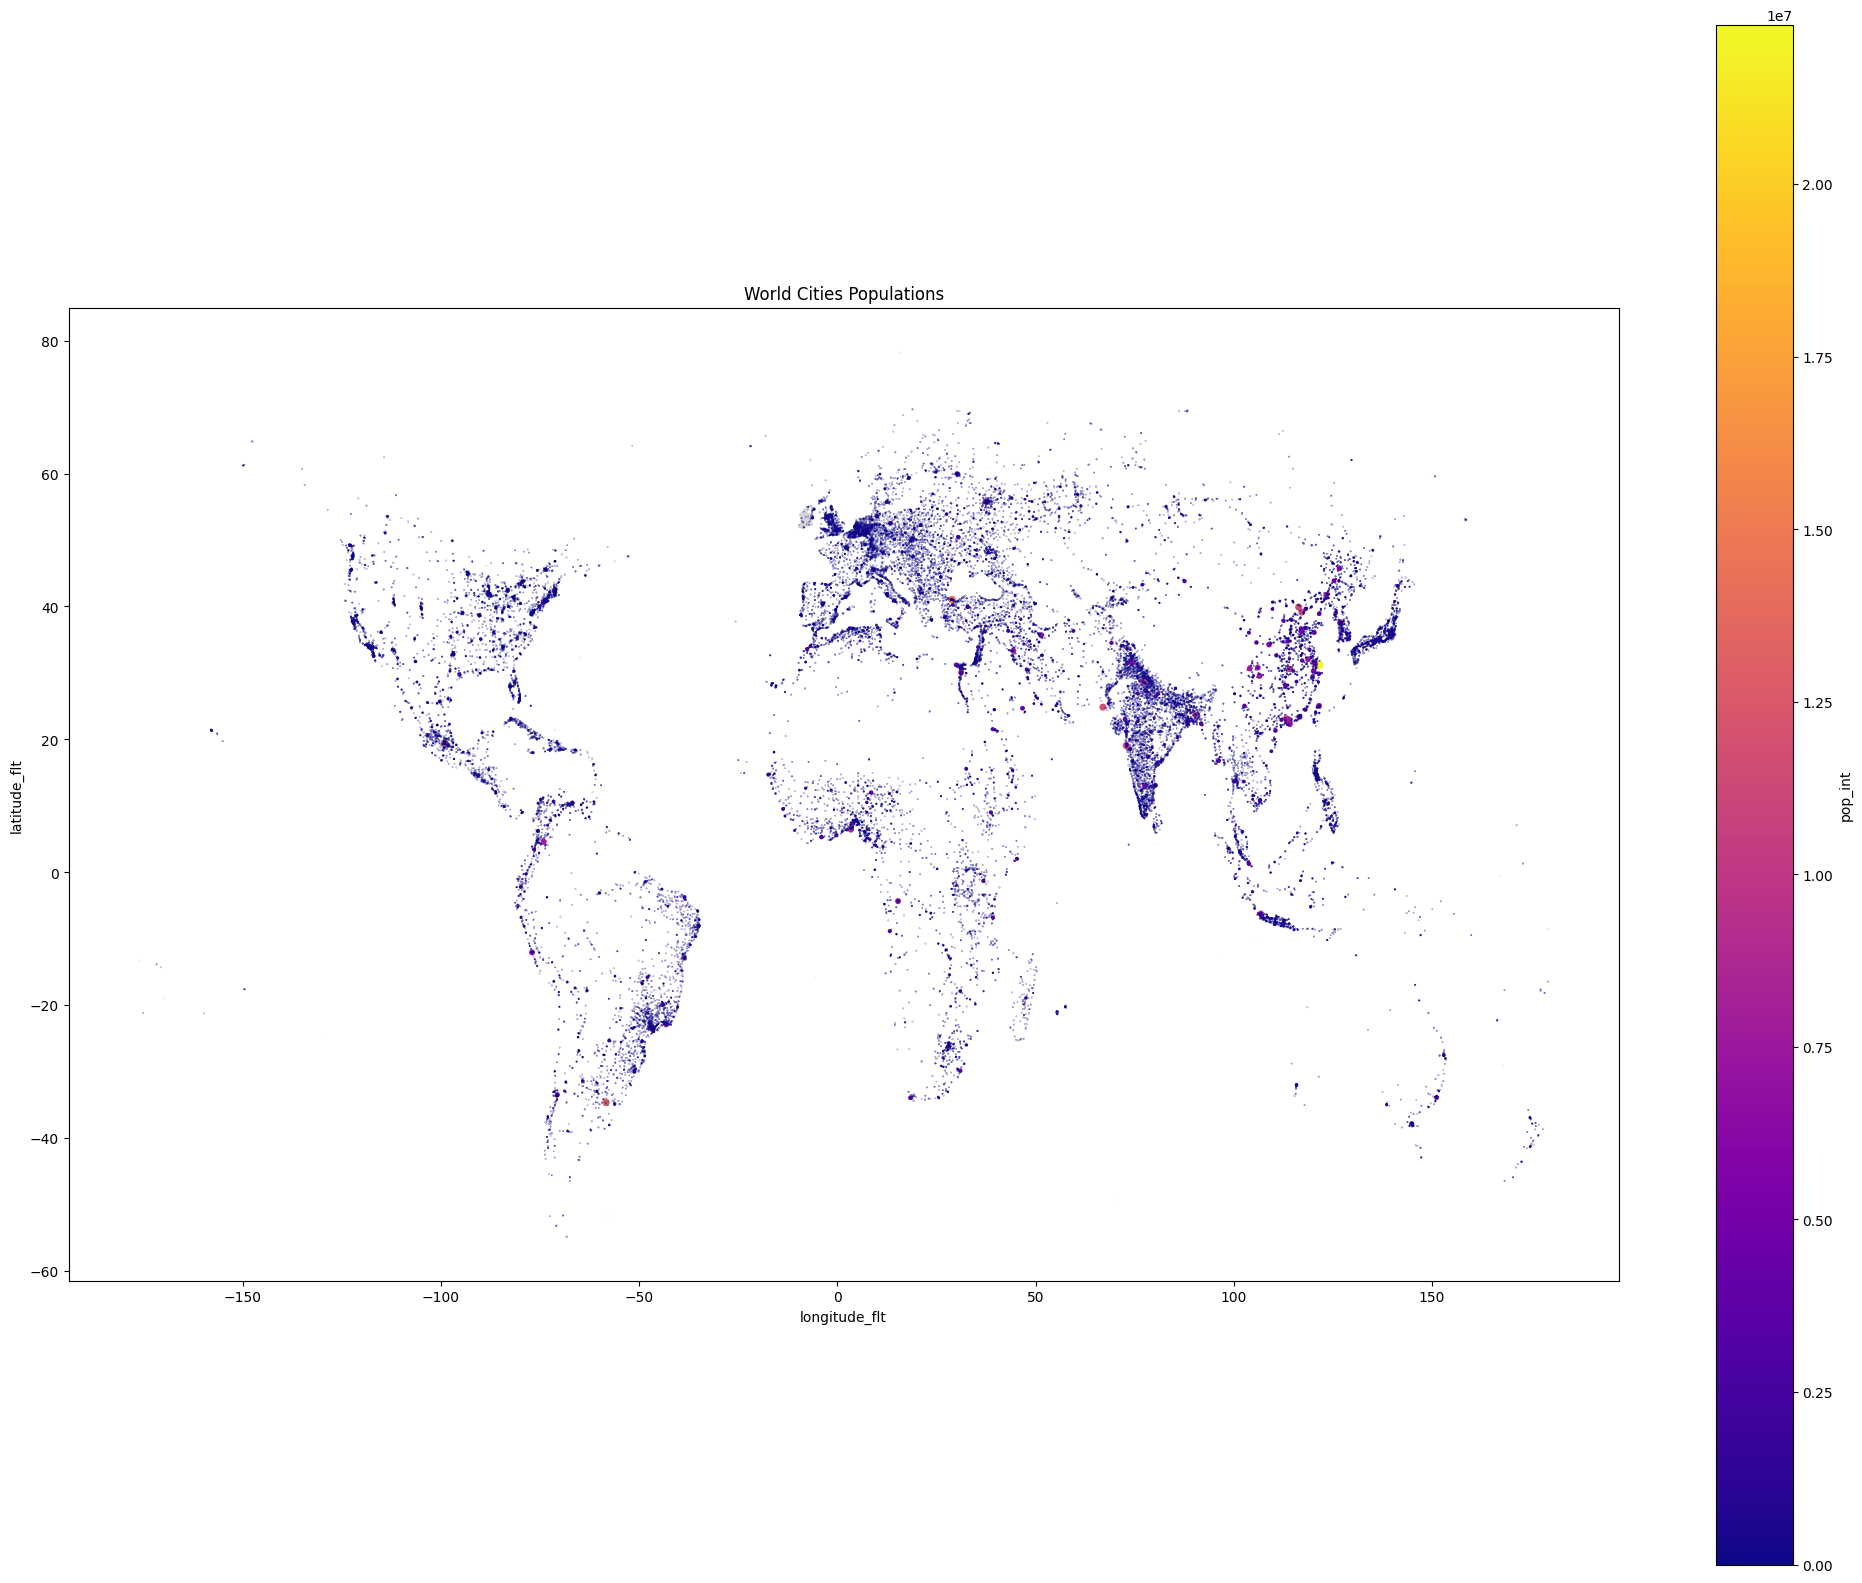

In [ ]:
# initialize an axis
fig, ax = plt.subplots(figsize=(25,20))
# plot map on axis
countries = gpd.read_file(
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Ireland"].plot(color="lightgrey",
               ax=ax)

#countries


# plot points
df2.plot(x="longitude_flt", y="latitude_flt", kind="scatter",
        c="pop_int", colormap="plasma",
        s = 0.05* df2["pop_int"]/35748,
        title=f"World Cities Populations",
        alpha = np.minimum(df2["pop_int"]/5, 1),
        ax=ax)
# add grid

plt.show()

In [ ]:
latitude_min, latitude_max = 51.5, 55.5
longitude_min, longitude_max = -10.5, -5.5

# Filter df2 to create df4 with entries located in Ireland
df4 = df2[
    (df2['latitude_flt'] >= latitude_min) & (df2['latitude_flt'] <= latitude_max) &
    (df2['longitude_flt'] >= longitude_min) & (df2['longitude_flt'] <= longitude_max)
]

# Display the filtered DataFrame
print(df4)

                       asciiname  population  latitude  longitude  \
7525                   Portadown     22000.0  54.42302   -6.44434   
7549                       Omagh     21056.0  54.60000   -7.30000   
7561                 Newtownards     29363.0  54.59236   -5.69092   
7562                Newtownabbey     63860.0  54.65983   -5.90858   
7567                       Newry     27757.0  54.17841   -6.33739   
7624  Londonderry County Borough     87153.0  54.99721   -7.30917   
7625                       Derry     83652.0  54.99810   -7.30934   
7634                     Lisburn     77506.0  54.52337   -6.03527   
7647                       Larne     18421.0  54.85000   -5.81667   
7703                   Coleraine     25681.0  55.13333   -6.66667   
7737                 Castlereagh     56679.0  54.57350   -5.88472   
7741               Carrickfergus     29208.0  54.71580   -5.80580   
7816                     Belfast    274770.0  54.59682   -5.92541   
7837                      Bangor  

<ipython-input-122-d98a2f33e501>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


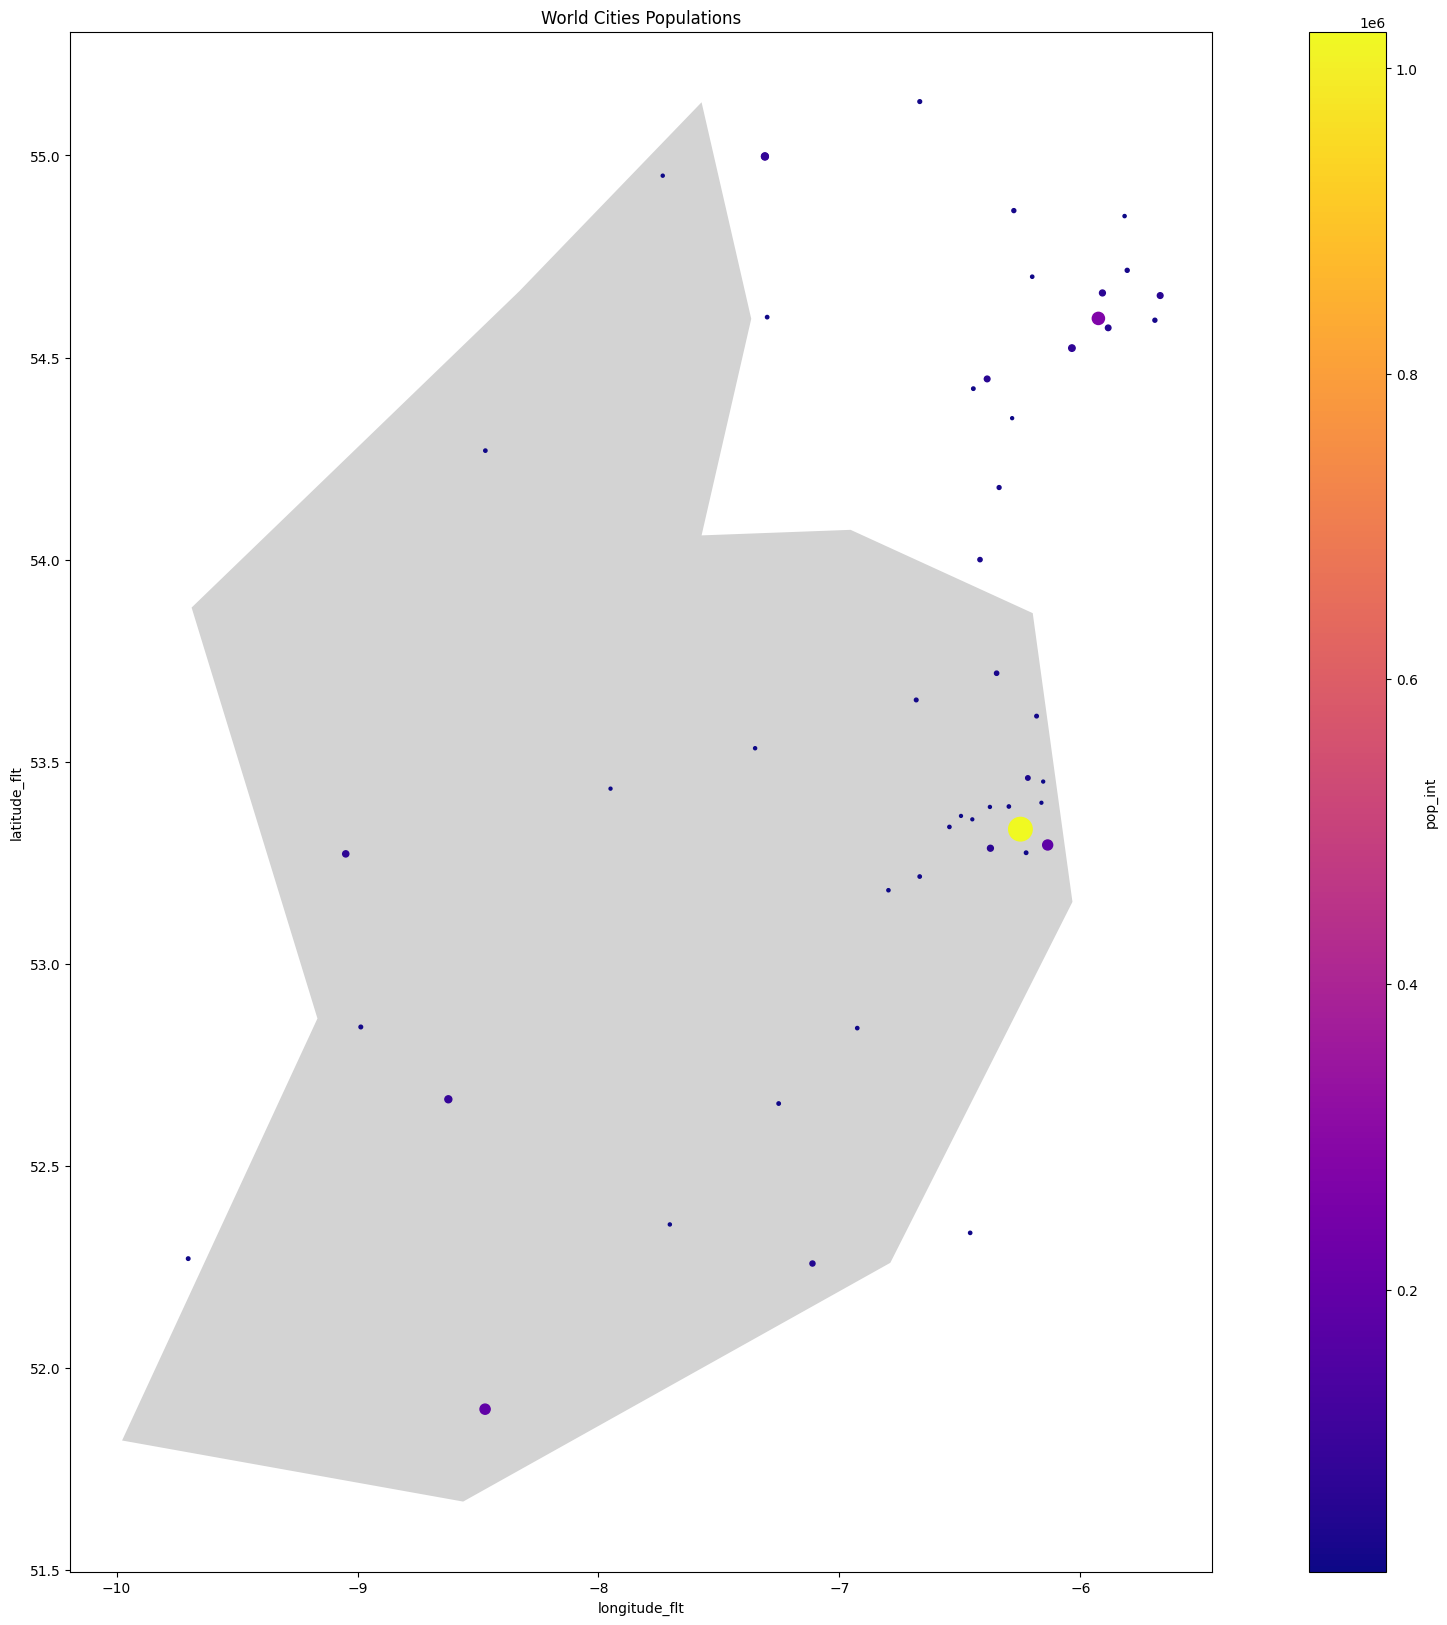

In [ ]:
# initialize an axis
fig, ax = plt.subplots(figsize=(25,20))
# plot map on axis
countries = gpd.read_file(
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Ireland"].plot(color="lightgrey",
               ax=ax)

#countries


# plot points
df4.plot(x="longitude_flt", y="latitude_flt", kind="scatter",
        c="pop_int", colormap="plasma",
        s = 10* df4["pop_int"]/35748,
        title=f"World Cities Populations",
        alpha = np.minimum(df4["pop_int"]/5, 1),
        ax=ax)
# add grid

plt.show()